# Lab Session #6.1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Fotios Drakopoulos, Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> Robbe De Beck [01902805], Robbe De Muynck [01908861]
<br>
<font color=blue>Academic Year:</font> 2022-2023

# Unsupervised and supervised learning

This exercise is adapted from the examples provided in the textbook "Neuronal Dynamics" by Gerstner, Kistler, Naud, Paninski (2014, Cambridge University Press) and the 2020 Neuron publication "Artificial Neural Networks for Neuroscientists: A Primer" publication by GR Yang and X-J Wang. Code adapted into exercise by Fotios Drakopoulos and Sarah Verhulst, UGent, 2021.

## Supervised learning: Oja's rule in Hebbian Learning <a id="introduction"></a>

The figure below shows the configuration of a neuron learning from the joint input of two presynaptic neurons. 

<img src='Oja_setup.png' width="400" height="400">

In this first part of the exercise, you will evaluate how the behavior of the pre-synaptic inputs and learning rate affect the weight optimisation under Oja's learning rule. The below code executes and plots the synaptic weights and post-synaptic firing rates given a cloud of presynaptic firing rates. You can modify the learning rate *eta* as well as the relationship between the pre-synaptic data by changing the *ratio* parameter. 

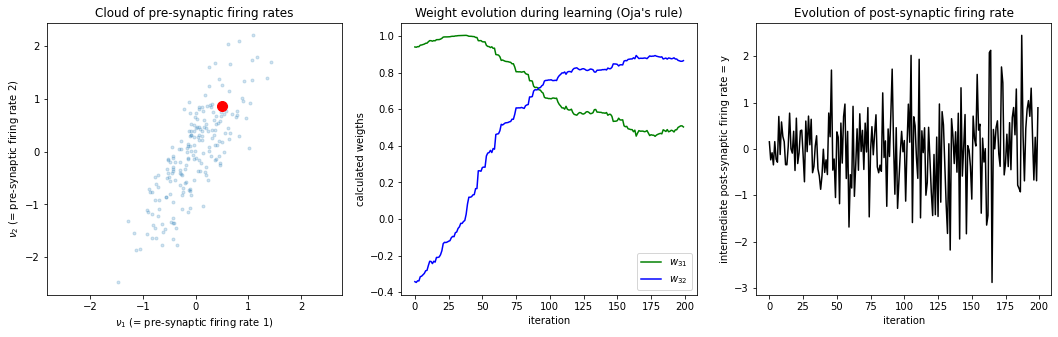

The final weight vector w is: (0.503, 0.865)


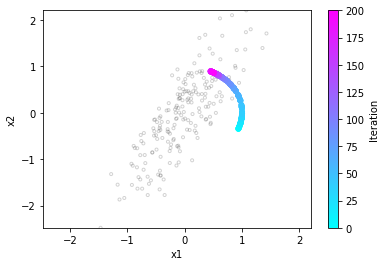

In [1]:
%matplotlib inline  
import oja as oja
import matplotlib.pyplot as plt
import numpy as np

def Oja_behaviour_plots(cloud, wcourse, out):

    # Plot 1: Cloud of pre-synaptic firing rates
    # x-axis: firing rate of pre-synaptic neuron 1
    # y-axis: firing rate of pre-synaptic neuron 2
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
    axs[0].plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
    axs[0].axis('equal')
    axs[0].set_xlabel(r"$\nu_1$ (= pre-synaptic firing rate 1)")
    axs[0].set_ylabel(r"$\nu_2$ (= pre-synaptic firing rate 2)")
    axs[0].set_title("Cloud of pre-synaptic firing rates")
    # plt.show()

    # Plot 2: Synaptic weight evolution during learning
    # fig, ax = plt.subplots(1, 1)
    axs[1].plot(wcourse[:, 0], "g", label="$w_{31}$")
    axs[1].plot(wcourse[:, 1], "b", label="$w_{32}$")
    axs[1].set_xlabel("iteration")
    axs[1].set_ylabel("calculated weigths")
    axs[1].set_title("Weight evolution during learning (Oja's rule)")
    axs[1].legend()
    # plt.show()

    # Plot 3: Evolution of post-synaptic firing rate
    # fig, ax = plt.subplots(1, 1)
    axs[2].plot(out[:, 0], "k")
    axs[2].set_xlabel("iteration")
    axs[2].set_ylabel("intermediate post-synaptic firing rate = y")
    axs[2].set_title("Evolution of post-synaptic firing rate")
    plt.show()

    # Print the final weight vector
    print("The final weight vector w is: ({:.3f}, {:.3f})".format(wcourse[-1,0],wcourse[-1,1]))

# Generate the cloud of pre-synaptic firing rates
np.random.seed(211)
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)

# Apply Oja's learning rule: obtain synaptic weight evolution
# eta: controls learning rate for weight updates
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# Construct plots regarding Oja's learning rule
Oja_behaviour_plots(cloud, wcourse, out)

# plot_oja_trace from oja.py
oja.plot_oja_trace(cloud, wcourse)

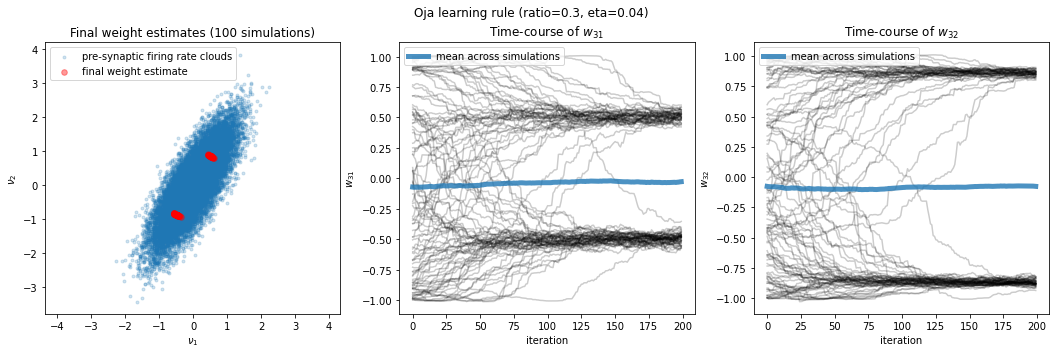

Mean final weight: (-0.027, -0.077)


In [2]:
def simul_100(ratio=0.3, eta=0.04, init_angle=None, n_iter=100, seed=211):
    
    np.random.seed(seed)
    clouds = np.zeros((n_iter, 200, 2))
    wcourses = np.zeros((n_iter, 200, 2))

    # Repeat simulations n_iter times
    for i in range(n_iter):
        # Generate pre-synaptic firing rates cloud 
        cloud = oja.make_cloud(n=200, ratio=ratio, angle=60)
        clouds[i] = cloud
        
        # Apply Oja's learning rule
        # initial_angle set to None: to visualize Oja learning strategy (random starting point)
        if init_angle is None:
            angle = np.random.rand() * 360 # if 90: nudge towards positive weights
            # print(angle)
        else: 
            angle = init_angle
        wcourse, out = oja.learn(cloud, initial_angle=angle, eta=eta)
        wcourses[i] = wcourse

    # Construct plots: Oja's learning rule (synaptic weight evolution)
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    axs[0].scatter(clouds[:, :, 0].flatten(), clouds[:, :, 1].flatten(),
                marker=".", alpha=.2, label="pre-synaptic firing rate clouds")
    axs[0].scatter(wcourses[:, -1, 0], wcourses[:, -1, 1],
                c="r", marker=".", alpha=0.4, s=125, label="final weight estimate")
    for wcourse in wcourses:
        axs[1].plot(wcourse[:, 0], "k", alpha=0.2)
        axs[2].plot(wcourse[:, 1], "k", alpha=0.2)
    axs[1].plot(wcourses[:, :, 0].mean(axis=0), lw=5, label='mean across simulations', alpha=0.8)
    axs[2].plot(wcourses[:, :, 1].mean(axis=0), lw=5, label='mean across simulations', alpha=0.8)

    fig.suptitle(f'Oja learning rule (ratio={ratio}, eta={eta})')
    axs[0].set_title(f"Final weight estimates ({n_iter} simulations)")
    axs[0].axis('equal')
    axs[0].set_xlabel(r"$\nu_1$")
    axs[0].set_ylabel(r"$\nu_2$")
    axs[0].legend(loc='upper left')
    axs[1].set_title("Time-course of $w_{31}$")
    axs[1].set_xlabel("iteration")
    axs[1].set_ylabel("$w_{31}$")
    axs[1].legend(loc='upper left')
    axs[2].set_title("Time-course of $w_{32}$")
    axs[2].set_xlabel("iteration")
    axs[2].set_ylabel("$w_{32}$")
    axs[2].legend(loc='upper left')
    plt.show()
    
    w = wcourses[:, -1, 0].mean(axis=0), wcourses[:, -1, 1].mean(axis=0)
    print("Mean final weight: ({:.3f}, {:.3f})".format(w[0], w[1]))

simul_100(ratio=0.3, eta=0.04)

### Q1: Oja learning <a id="Q1"></a>

Run the above code and get a feeling for what the function and figures do. You can think of each of the two columns of the cloud as the time series of firing rates of the presynaptic neurons $\nu_1$ and $\nu_2$.

- Change the learning rate eta from the original value to a much larger value 0.2, qualitatively describe the effect of this change on the weight optimisation

The original data-cloud of pre-synaptic firing rates showed correlations between the firing rates. For the next simulation, you will simulate how study Oja’s rule works on a data set which has no correlations. 

- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights?

- Now do this for different learning rates eta, and qualitatively describe the effects

- Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04?

* [Fill in answer here](#A1)

### Q2: Oja final weights <a id="Q2"></a>

If we assume a linear firing rate model, we can write $\nu^{post}=\sum_{j}w_{j}\nu_{j}^{pre}=w \cdot \nu^{pre}$, where the dot denotes a scalar product, and hence the output rate $\nu^{post}$ (or $y$) can be interpreted as a projection of the input vector onto the weight vector. 

- After learning (e.g. ratio 0.3 and eta 0.04), what does the output y tell about the input? Can you see a resemblance between Oja's learning rule and a principle component analysis?

- Take the final weights [w31, w32], then calculate a single input vector (v1=?, v2=?) that leads to a maximal output firing y. You can perform this procedure by first constraining your input to norm([v1,v2]) =1 to write v2 as a function of v1. Then simulate $y$ for v1 in range between -1 and +1 to graphically determine the maximal firing rate (no need to compute the derivative). 

- Perform the same procedure, but now calculate the input vector which leads to a minimal output firing y.

The above exercises assume that the input activities can be negative (indeed the inputs were always statistically centered). In actual neurons, if we think of their activity as their firing rate, this cannot be less than zero.

- Repeat the simulations from this block, but by applying the learning rule on a noncentered data cloud. E.g., use cloud = (3,5) + oja.make_cloud(n=1000, ratio=.4, angle=-45), which centers the data around (3,5). What conclusions can you draw? Can you think of a modification to the learning rule?

* [Fill in answer here](#A2)

## Answers
#### A1: Oja Learning  <a id="A1"></a>
* [Go back to Q1](#Q1) 

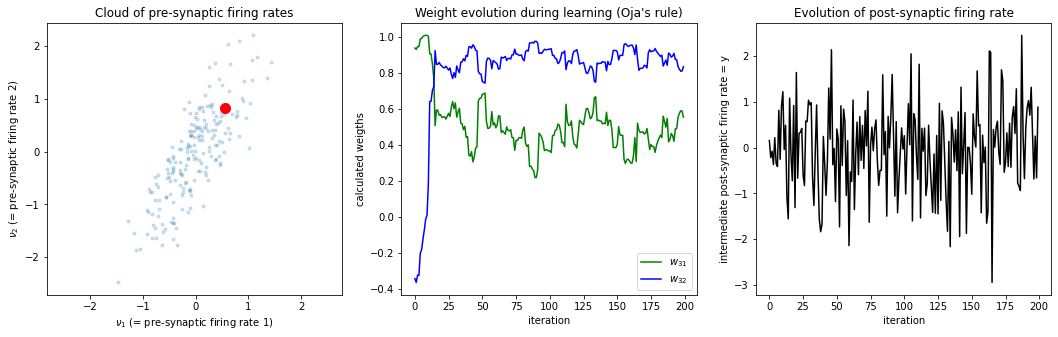

The final weight vector w is: (0.555, 0.836)


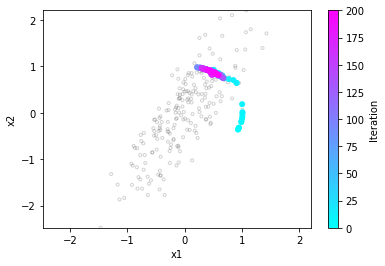

In [3]:
##### Larger learning rate: eta = 0.2 (vs 0.04) #####

# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
np.random.seed(211)
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.2)

# Construct plots: Oja's learning rule (synaptic weight evolution)
Oja_behaviour_plots(cloud, wcourse, out)

# plot_oja_trace from oja.py
oja.plot_oja_trace(cloud, wcourse)

<div class="alert alert-success">
<span style="color:black">

**Q1.1 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->
<!-- Qualitatively describe the effect of this change on the weight optimisation -->

The Oja learning rule results in synaptic weights that are asymptotically normalized to 1 (i.e. the sum of the
squared weights equals 1).
Increasing the learning rate eta to 0.2 leads to faster weight optimisation: the weights converge more quickly towards their final values (around 20 iterations instead of 125), resulting in a steeper slope at the start of the weight evolution plot. This indicates that larger learning rates allow for faster adaptation of the synaptic weights. However, due to the larger learning rate, the weight evolution is a lot less smooth for the higher learning rate scenario, indicating more oscillations around the asymptotical convergence instead of gradually reaching the stable convergence.

In conclusion: larger learning rates can lead to faster convergence of the synaptic weights, but with the drawback of a less stable solution.

<!-- \end{tcolorbox} -->
     
</span>

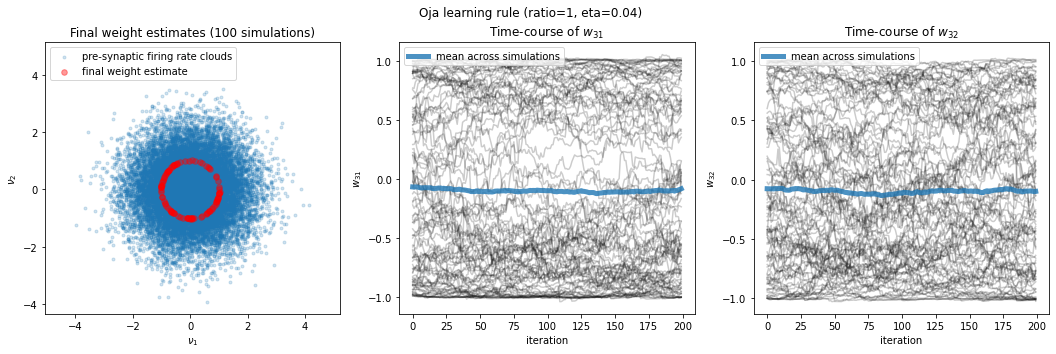

Mean final weight: (-0.087, -0.099)


In [4]:
##### No pre-synaptic firing rates correlation: ratio = 1 #####

# Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations
# many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data.
# Each time you call the *learn* function, it will choose a new set of random initial conditions.
# Can you explain what happens to the final weight estimate and the time-course of the weights?

simul_100(ratio=1, eta=0.04, n_iter=100, seed=211)

<div class="alert alert-success">
<span style="color:black">

**Q1.2 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->

<!-- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights? -->

Initial angles for the Oja learning simulation are randomly determined. When simulating for circular data sets with no correlations (ratio=1), one can appreciate that the weights do not exhibit convergence towards a clear preferred final weight.
This indicates that Oja's rule struggles to find meaningful weights when there are no correlations in the data.

The time-course of the weights for each simulation shows fluctuating behavior around the initial (random) starting point of the weight optimization.
However, an important observation is that the weights are located on the unit circle: the asymptotic normalization of the weight vector is dictated by Oja's rule.

An interesting observation to make is the fact that the mean of the final weight vector ($w_{31}$, $w_{32}$) across simulations approaches (0, 0). This indicates that the mean final weight could be the result of a random sampling of the unit circle. One can interprete this behaviour as the synaptic weights having no meaningful optimized scenario to converge to.

<!-- Despite the fluctuation and lack of convergence, the weights maintain a specific geometric relationship. This highlights the inherent constraints of Oja's rule in finding meaningful weights in the absence of correlations, while still preserving certain properties dictated by the rule. -->

<!-- \end{tcolorbox} -->
     
</span>

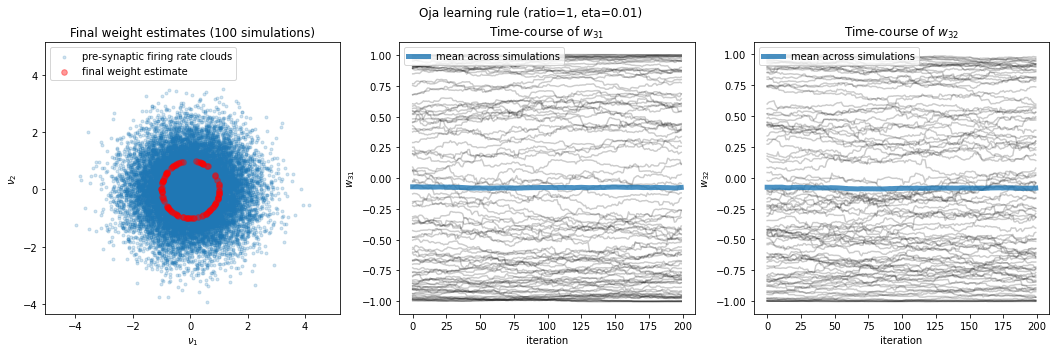

Mean final weight: (-0.076, -0.084)


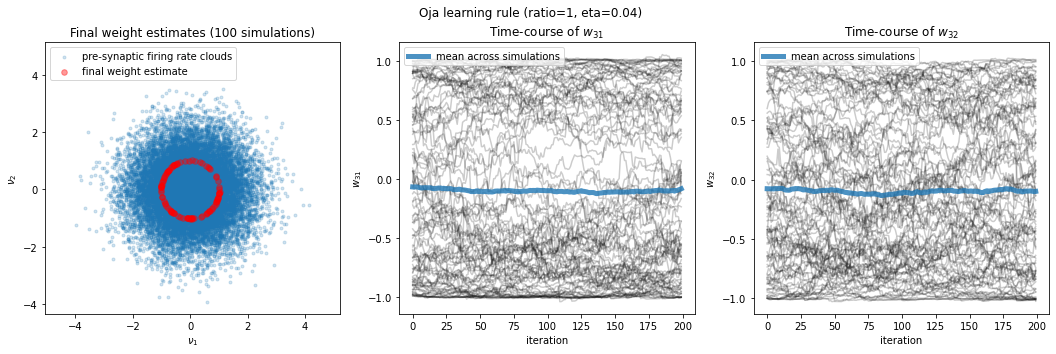

Mean final weight: (-0.087, -0.099)


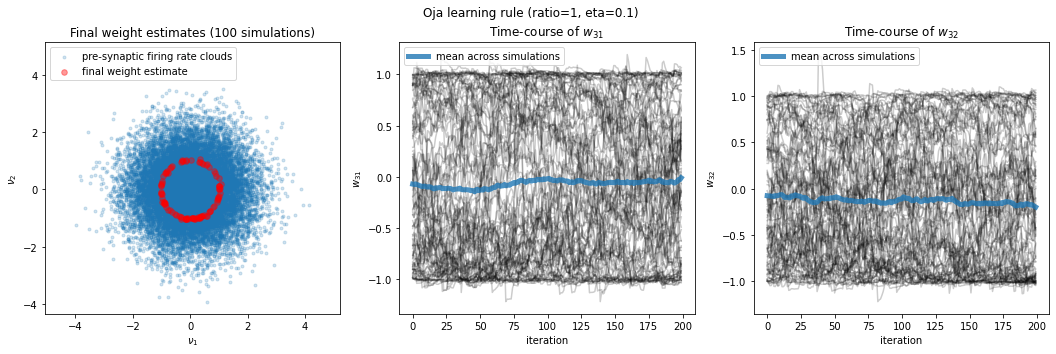

Mean final weight: (-0.009, -0.199)


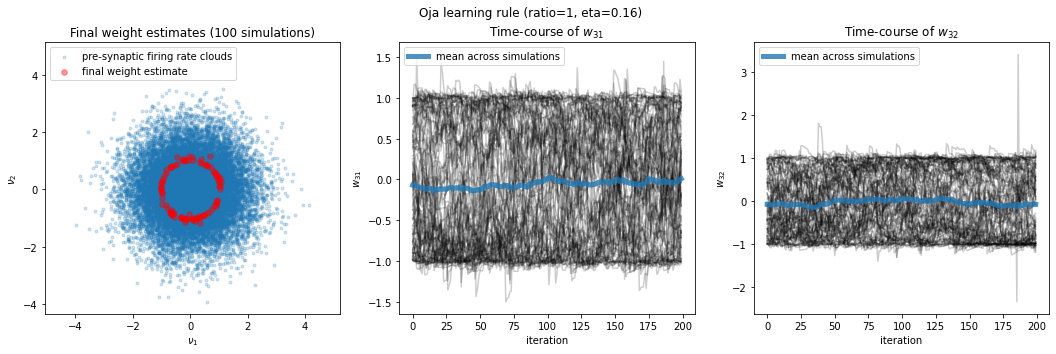

Mean final weight: (0.008, -0.075)


In [5]:
##### Different learning rates eta (ratio = 1) #####

# Now do this for different learning rates eta,
# and qualitatively describe the effects

etas = [0.01, 0.04, 0.1, 0.16]
for eta in etas:
    simul_100(ratio=1, eta=eta, n_iter=100, seed=211)

<div class="alert alert-success">
<span style="color:black">

**Q1.3 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->

<!-- Now do this for different learning rates eta, and qualitatively describe the effects -->

With a small learning rate, the weight updates are more incremental and cautious, allowing for finer adjustments and exploration of different weight values. This leads to greater variability in the final weight estimates across different simulations because the algorithm has more flexibility to explore different regions of the weight space. Small learning rate leads to slow convergence.

On the other hand, with a high learning rate, the weight updates dominate the learning process and the algorithm is more likely to make large jumps in weight values. As a result, the final weights can differ more from the initial weights, but also instability can occur (as is the case for eta=0.16).

<!-- the final weight estimates across different simulations tend to converge to a similar location because the high learning rate overrides the randomness of the uncorrelated data, pushing the weights towards a common outcome. Starting from eta=0.075, one can see that a larger fraction of the simulations has instable final weights. -->
<!-- In summary, a too high learning rate in the presence of uncorrelated circular data tends to drive the final weight estimates towards a similar location (if the same initial point cloud is used for all the simulations), resulting in less variability and more instability among different simulations compared to a small learning rate. A too small learning rate results in slow convergence. -->
    
<!-- When varying the learning rate, eta, different effects can be observed. Higher learning rates result in faster convergence of the weights, but they can also lead to instability and overshooting of the optimal weights. Lower learning rates result in slower convergence but may provide more stable weight estimates. -->



<!-- \end{tcolorbox} -->
     
</span>

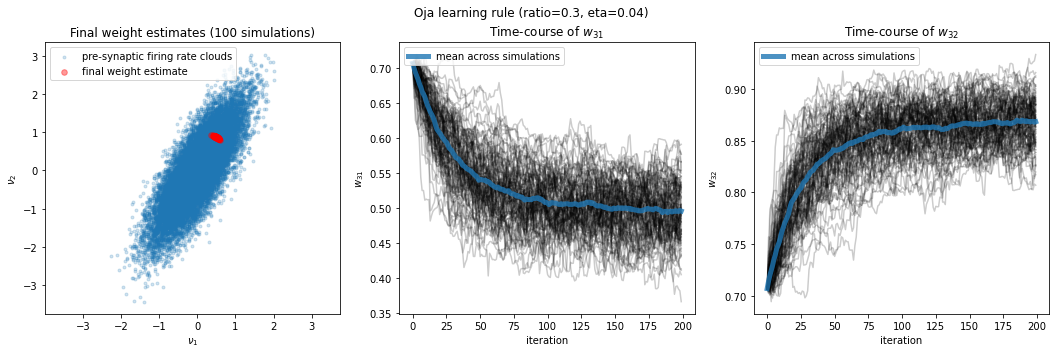

Mean final weight: (0.496, 0.868)


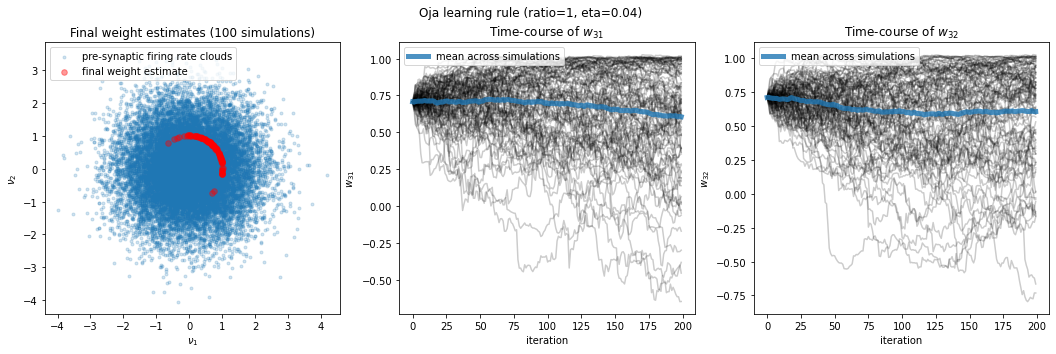

Mean final weight: (0.606, 0.603)


In [6]:
##### Difference in learning between ratio = 0.3 and 1 #####
#####             (eta = 0.04, ratio 0.3)              #####
# --> repeat simulations 100 times

simul_100(ratio=0.3, eta=0.04, init_angle=45, n_iter=100, seed=211)
simul_100(ratio=1, eta=0.04, n_iter=100, init_angle=45, seed=211)

<div class="alert alert-success">
<span style="color:black">

**Q1.4 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->

<!-- Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04? -->

When comparing different ratios (0.3 and 1) with a learning rate of 0.04, it is observed that the weight optimization process under Oja's rule is more effective for the 0.3 ratio condition. In the 0.3 ratio condition, the data exhibits an ellipsoidal cloud shape and the final weight vectors consistently converge to meaningful values at an angle of around 60°. The time course of the weights shows smoother convergence with fewer fluctuations among the 100 simulations.

On the other hand, in the ratio=1 condition, where the data lacks correlations and appears more circular, the weight optimization process is less effective. The final weight vectors tend diverge more in the time-course, indicating the struggle of Oja's rule to find meaningful weights in the absence of correlations. This suggests that having some correlations in the data improves the learning process and leads to better convergence under Oja's rule.

<!-- \end{tcolorbox} -->
     
</span>

#### A2: Oja final weights  <a id="A2"></a>
* [Go back to Q2](#Q2) 

In [7]:
# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
np.random.seed(211)
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)
w_final = np.array([wcourse[-1,0], wcourse[-1,1]])

print("The final weight vector w is: ({:.3f}, {:.3f})".format(wcourse[-1,0],wcourse[-1,1]))

The final weight vector w is: (0.503, 0.865)


<div class="alert alert-success">
<span style="color:black">

**Q2.1 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->
    
<!-- Your answer here -->

After learning with Oja's rule, the output firing rate (y) provides information about the input firing rates of the pre-synaptic neurons. It can be interpreted as the weighted sum of the input firing rates, where each weight represents the importance or significance of the corresponding input firing rate. The weights are obtained through Oja's learning rule, which updates the weights to maximize the variance of the output firing rate.

This relationship between the output firing rate and the input firing rates resembles the concept of principal component analysis (PCA). In PCA, the goal is to find the direction in which the data exhibits the largest variance. The first principal component captures the direction with the maximal variance. Similarly, in Oja's learning rule, the weights correspond to the importance of each input firing rate, and the firing rates themselves correspond to the respective vectors in PCA.

Therefore, Oja's learning rule shares similarities with PCA, as both methods aim to capture the statistical structure of the data by finding the important directions (weights in Oja's rule, principal components in PCA) that contribute to the output firing rate or variance.

<!-- \end{tcolorbox} -->
     
</span>

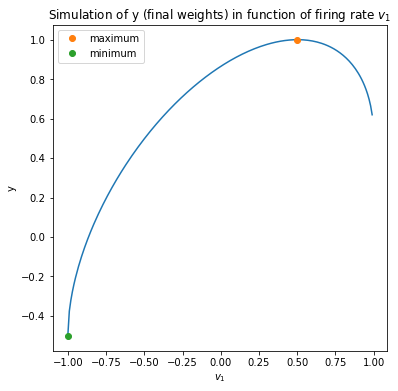

Maximal firing rates (v1, v2): (0.500, 0.866)
=> Maximal output y = 1.001
-------------------------------------------
Minimal firing rates (v1, v2): (-1.000, 0.000)
=> Minimal output y = -0.503



In [8]:
#### Q2.2 & Q2.3 ####
w_31, w_32 = w_final[0], w_final[1]
v1 = np.arange(-1, 1, 0.01)
v2 = np.sqrt(1 - v1**2)
y = w_31*v1 + w_32*v2

idx_max, idx_min = np.argmax(y), np.argmin(y)
y_max, y_min = np.max(y), np.min(y)
v1_max = v1[idx_max]
v2_max = v2[idx_max]
v1_min = v1[idx_min]
v2_min = v2[idx_min]

# Construct plot of maximalization and minimalization procedure
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(v1, y)
ax.plot(v1_max, y_max, 'o', linewidth=6, label='maximum')
ax.plot(v1_min, y_min, 'o', linewidth=6, label='minimum')

ax.set_title('Simulation of y (final weights) in function of firing rate $v_1$')
ax.set_xlabel('$v_1$')
ax.set_ylabel('y')
ax.legend()
plt.show()

print(f"""Maximal firing rates (v1, v2): ({v1_max:.3f}, {v2_max:.3f})
=> Maximal output y = {y_max:.3f}
-------------------------------------------
Minimal firing rates (v1, v2): ({v1_min:.3f}, {v2_min:.3f})
=> Minimal output y = {y_min:.3f}
""")

<div class="alert alert-success">
<span style="color:black">

**Q2.2 Answer & 2.3 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->
    
Both the maximal and minimal firing rate procedure can be found in the code above, as well as the graphical determination and the final print statements.

The procedure for finding the input vectors that maximize or minimize the output firing rate takes into account the weights of both pre-synaptic neurons and their corresponding contributions to the output firing rate.


<!-- \end{tcolorbox} -->
     
</span>

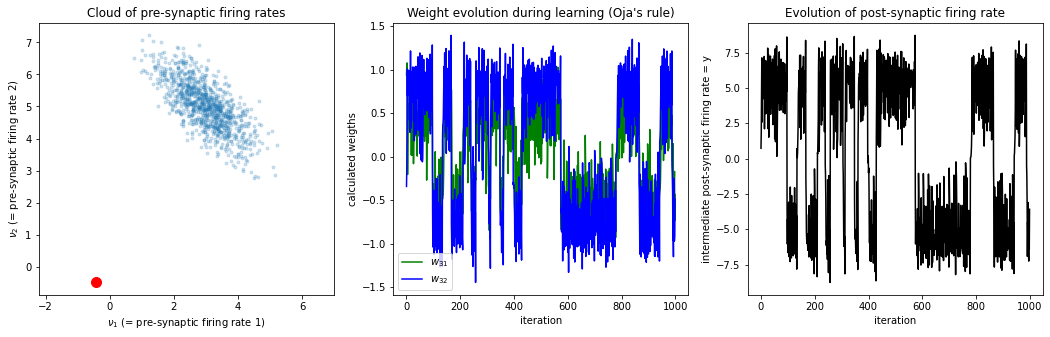

The final weight vector w is: (-0.435, -0.487)


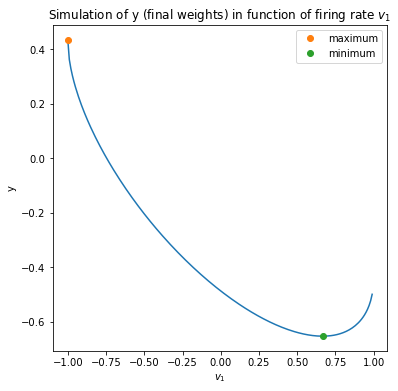

Maximal firing rates (v1, v2): (-1.000, 0.000)
=> Maximal output y = 0.435
-------------------------------------------
Minimal firing rates (v1, v2): (0.670, 0.742)
=> Minimal output y = -0.653



In [9]:
#### Q2.4: Application of learning rule on a non-centered data cloud ####

# Generate pre-synaptic firing rates cloud & apply Oja's learning rule
np.random.seed(211)
cloud = (3, 5) + oja.make_cloud(n=1000, ratio=.4, angle=-45)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)
w_final = np.array([wcourse[-1,0], wcourse[-1,1]])

Oja_behaviour_plots(cloud, wcourse, out)

# Perform previous maximization an minimalization analysis of y

w_31, w_32 = w_final[0], w_final[1]
v1 = np.arange(-1, 1, 0.01)
v2 = np.sqrt(1 - v1**2)
y = w_31*v1 + w_32*v2

idx_max, idx_min = np.argmax(y), np.argmin(y)
y_max, y_min = np.max(y), np.min(y)
v1_max = v1[idx_max]
v2_max = v2[idx_max]
v1_min = v1[idx_min]
v2_min = v2[idx_min]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(v1, y)
ax.plot(v1_max, y_max, 'o', linewidth=6, label='maximum')
ax.plot(v1_min, y_min, 'o', linewidth=6, label='minimum')

ax.set_title('Simulation of y (final weights) in function of firing rate $v_1$')
ax.set_xlabel('$v_1$')
ax.set_ylabel('y')
ax.legend()
plt.show()

print(f"""Maximal firing rates (v1, v2): ({v1_max:.3f}, {v2_max:.3f})
=> Maximal output y = {y_max:.3f}
-------------------------------------------
Minimal firing rates (v1, v2): ({v1_min:.3f}, {v2_min:.3f})
=> Minimal output y = {y_min:.3f}
""")

<div class="alert alert-success">
<span style="color:black">

**Q2.4 Answer** 
    
<!-- \begin{tcolorbox}[colback=green!5] -->
    
<!-- Your answer here -->

When applying Oja's learning rule to a non-centered data cloud, the learned weights may be biased towards the center of the cloud. This bias occurs because the learning rule does not consider the mean of the data cloud. As a result, the weights do not converge to their correct values and there is oscillation around zero, with the final weight lying outside the data cloud.

<!-- \end{tcolorbox} -->
     
</span>

<div class="alert alert-success">
<span style="color:black">

To address this issue and ensure accurate weight optimization, a modification to the learning rule can be made. By subtracting the mean of the data cloud from the pre-synaptic firing rates before applying the learning rule, the data is centered around to origin. This modification allows the learning rule to update in the correct direction for subsequent iterations. If the final result is desired for the non-centered data cloud, the mean can be added again after having applied Oja's rule.

<!-- \end{tcolorbox} -->
     
</span>